Thuật toán Perceptron:
1. Tại thời điểm $t = 0$, chọn ngẫu nhiên một vector hệ số $w_0$.
2. Tại thời điểm $t$, nếu không có điểm dữ liệu nào bị phân lớp lỗi, dừng thuật toán.
3. Giả sử $x_i$ là một điểm bị phân lớp lỗi. Cập nhật
$$w_{t+1} = w_t + y_ix_i$$
4. Thay đổi $t = t + 1$ rồi quay lại Bước 2.

In [166]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [167]:
import numpy as np
def predict(w, X):
    ''' predict label of each row of X, given w
    X: a 2-d numpy array of shape (N, d), each row is a datapoint
    w_init: a 1-d numpy array of shape (d) '''
    return np.sign(X.dot(w))
def perceptron(X, y, w_init):
    ''' perform perceptron learning algorithm
    X: a 2-d numpy array of shape (N, d), each row is a datapoint
    y: a 1-d numpy array of shape (N), label of each row of X. y[i] = 1/-1
    w_init: a 1-d numpy array of shape (d) '''
    w = w_init
    while True:
        pred = predict(w, X)
        # find indexes of misclassified points
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # number of misclassified points
        num_mis = mis_idxs.shape[0]
        if num_mis == 0: # no more misclassified points
            return w
        # random pick one misclassified point
        random_id = np.random.choice(mis_idxs, 1)[0]
        # update w
        w = w + y[random_id]*X[random_id]

In [168]:
means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 50
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
w = perceptron(Xbar, y, w_init)

print(w)

[ 0.07347647 -1.90630465  1.02829325]


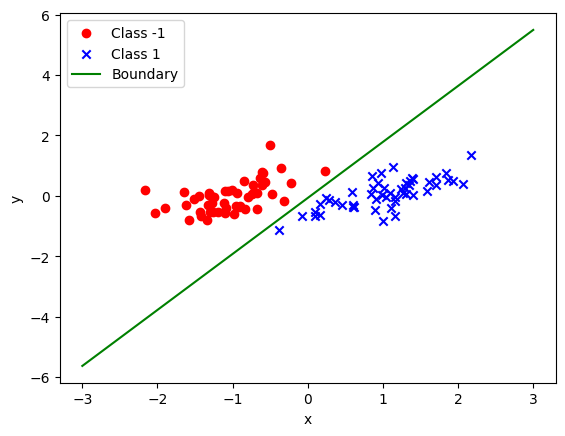

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X0[:, 0], X0[:, 1], c='r', marker='o', label='Class -1')
plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='x', label='Class 1')

# Plot the decision boundary
x_boundary = np.linspace(-3, 3, 100)
y_boundary = (-w[0] - w[1] * x_boundary) / w[2]
plt.plot(x_boundary, y_boundary, '-g', label='Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()